## Kaggle competition
### Titanic: Machine Learning From Desaster
Jens Hahn

### 1. EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data set

In [2]:
df = pd.read_csv('data/train.csv', index_col=0)

Set naming of column correctly: SibSp, ParCh

In [3]:
df.rename({'Parch': 'ParCh'}, axis=1, inplace=True)

### Missing values

Fill missing 'Age' values with `mean` 

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

Filling missing 'Embarked' entries with `mode`

In [5]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

Filling missing 'Cabin' entries with the letter 'U' (unknown)

In [6]:
df['Cabin'] = df['Cabin'].fillna('U')

### Plots to learn about the outcome of the desaster
Age distribution per class 

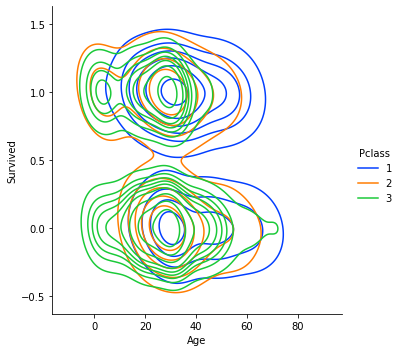

In [7]:
sns.displot(data=df, x='Age', y='Survived', hue='Pclass', kind='kde', palette='bright')

Age distribution per sex

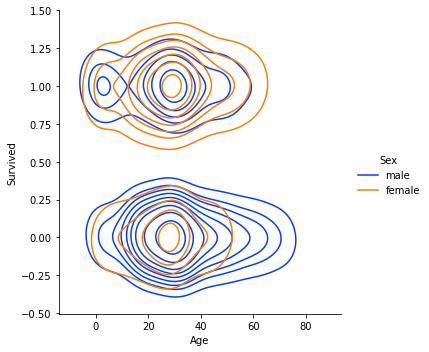

In [8]:
sns.displot(data=df, x='Age', y='Survived', hue='Sex', kind='kde', palette='bright')

Survival rate by class and sex

In [9]:
relative_class_sex_survived = df.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True)
plot_data = relative_class_sex_survived.unstack()

Text(0.5, 1.0, 'Survival rate by class and sex')

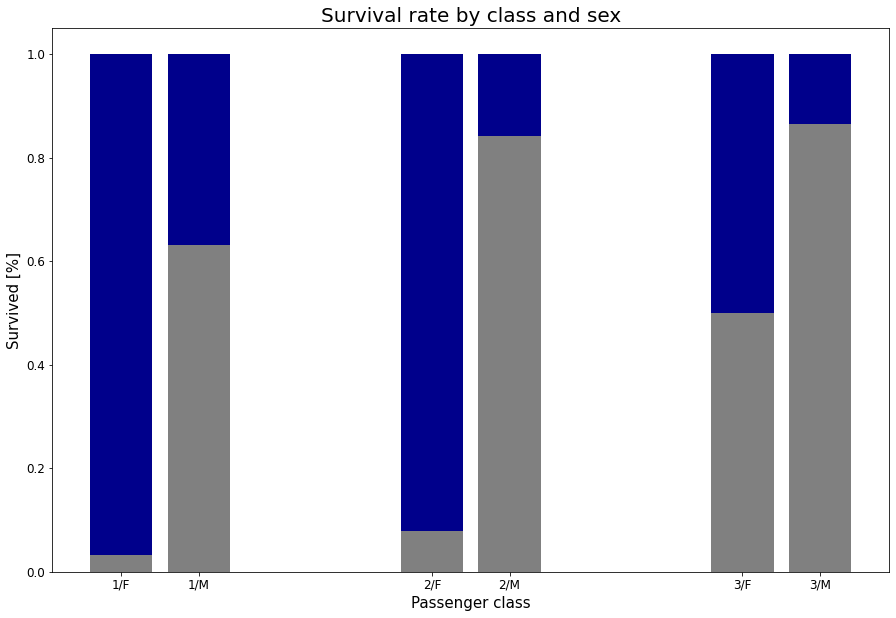

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for i, setting in enumerate(plot_data.index):
    ax.bar(x=i-(i%2)/2, width=0.4, height=1, label='survived', color='darkblue');
    ax.bar(x=i-(i%2)/2, width=0.4, height=plot_data.loc[setting,0], label='dead', color='grey');

plt.xlabel('Passenger class', fontsize=15)
plt.ylabel('Survived [%]', fontsize=15)
plt.xticks([0, 0.5, 2, 2.5, 4, 4.5], 
           labels=['1/F', '1/M', '2/F', '2/M', '3/F', '3/M'],
          fontsize=12);
plt.tick_params('both', labelsize=12)
plt.title('Survival rate by class and sex', fontsize=20)

Survival rate by cabin

In [11]:
df['Cabin'] = df['Cabin'].str[0]

In [12]:
cabin = df.groupby('Cabin')['Survived'].value_counts(normalize=True).unstack().iloc[:,0]

Text(0, 0.5, 'Survival rate [%]')

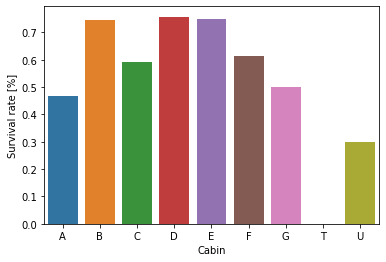

In [13]:
sns.barplot(x=cabin.index, y=1-cabin)
plt.ylabel('Survival rate [%]')

Survival rate by family size

In [14]:
df['family'] = df['SibSp'] + df['ParCh'] + 1

In [15]:
family = df.groupby('family')['Survived'].value_counts(normalize=True).unstack().iloc[:,0]

Text(0, 0.5, 'Survival rate [%]')

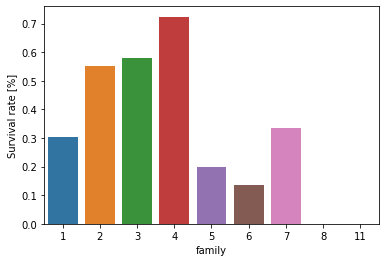

In [16]:
sns.barplot(x=family.index, y=1-family)
plt.ylabel('Survival rate [%]')

Survival rate by name length

In [17]:
df['name_length'] = df['Name'].str.len()

In [18]:
name_length = df.groupby('name_length')['Survived'].value_counts(normalize=True).unstack().iloc[:,0]

In [19]:
name_length.fillna(0, inplace=True)

Text(0.5, 0, 'name length [#]')

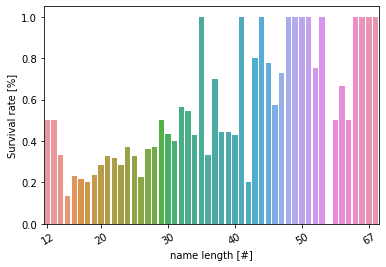

In [20]:
sns.barplot(x=name_length.index, y=1-name_length)
plt.ylabel('Survival rate [%]')
plt.xticks([0, 8,18,28,38,48],rotation=30, fontsize=10);
plt.xlabel('name length [#]')

Distributions

In [21]:
selection = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 
             'Embarked', 'family', 'name_length'];

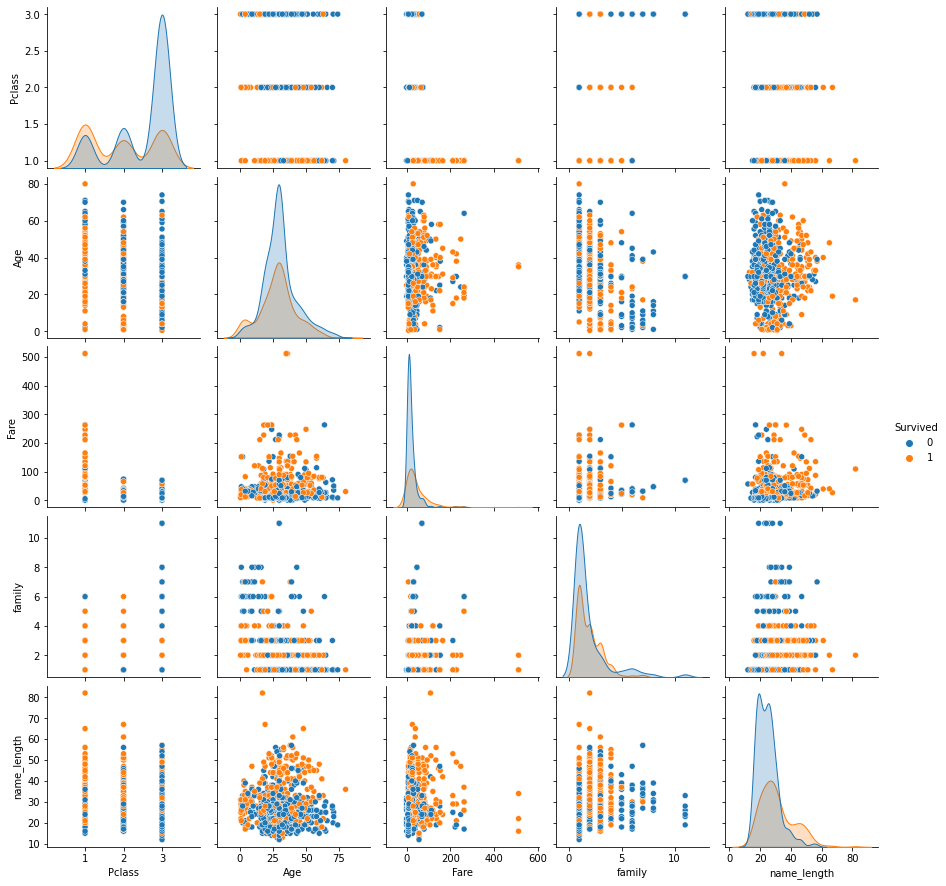

In [22]:
sns.pairplot(df[selection], hue='Survived')

Convert categoricals to numbers

In [35]:
df['Sex'] = pd.Categorical(df['Sex']).codes

In [38]:
df['Cabin'] = pd.Categorical(df['Cabin']).codes

In [40]:
df['Embarked'] = pd.Categorical(df['Embarked']).codes